In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/linear-regression-dataset/Linear Regression - Sheet1.csv


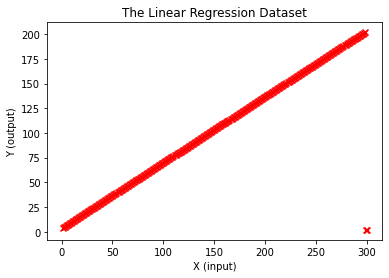

In [2]:
#Reading input data 
#The dataset contains 2 columns and 300 rows
#First column - input data (X)
#Second column - target label (Y)
import pandas as pd
filename="/kaggle/input/linear-regression-dataset/Linear Regression - Sheet1.csv"
f1 = open(filename,'r')
lines=pd.read_csv(f1)
# print(lines.head())

#Visualizing the data with a scatter plot
import matplotlib.pyplot as plt
dataset=lines.copy()
# print(dataset[:])
x = dataset['X']
y = dataset['Y']
dataset.to_pickle('lr_dataset.pkl')
plt.scatter(x,y,c="red",marker="x")
plt.title("The Linear Regression Dataset")
plt.xlabel("X (input)")
plt.ylabel("Y (output)")
plt.show()

In [3]:
###A few function definitions before moving on to the driver code

#Function to make prediction, or compute h(x)
def compute_hx(x, parameters):
    m = len(x)
    # print(parameters[0])
    hx = []
    # print("m = ",m)
    for i in range(m):
        # print("i=",i)
        prediction = parameters[0]
        prediction+= parameters[1]*x.iloc[i]
        hx.append(prediction)
    return hx

#Function to compute Linear Regression Cost
def compute_cost(hx, y):
    m = len(hx)
    sum1 = 0
    for i in range(m):
        sum1 += (hx[i] - y.iloc[i])**2
    cost = sum1/(2*m)
    return cost

In [4]:
#Function to minimize the cost function (Gradient Descent, but one step only) 
def gradient_descent_one_step(hx,x,y, parameters, alpha):
    m = len(hx)
    sum1 = 0
    sum2 = 0
    for i in range(m):
        sum1 += (hx[i] - y.iloc[i])
        sum2 += (hx[i] - y.iloc[i])*(x.iloc[i])
    cost1 = (sum1 * alpha)/m
    cost2 = (sum2 * alpha)/m
    parameters[0] -= cost1
    parameters[1] -= cost2
    return parameters

In [5]:
#Function to perform batch gradient descent, over many epochs
def batch_gradient_descent(x, y, parameters, alpha, epochs):
    cost_list={}
    parameter_list={}
    param_cost_list_1={}
    param_cost_list_0={}
    for i in range(epochs):
        hx = compute_hx(x, parameters)
        cost = compute_cost(hx, y)
        parameters = gradient_descent_one_step(hx,x,y,parameters,alpha)
        # The following if block stores data for graph_plotting
        if i%10==0:
            # Saving cost and params here, which'll help to plot graphs
            cost_list[i] = cost
            parameter_list[i] = parameters
            param_cost_list_1[parameters[1]] = cost
            param_cost_list_0[parameters[0]] = cost
    return parameters,cost,cost_list,parameter_list, param_cost_list_1, param_cost_list_0

In [6]:
import pandas as pd
dataset = pd.read_pickle('lr_dataset.pkl')
print(dataset.shape)

#Split the dataset into 70% training, 10% Validation and 20% testing
#70% of 300 = 210
#10% of 300 = 30
#20% of 300 = 60

#Before splitting, shuffle the dataset first
dataset = dataset.sample(frac = 1).reset_index(drop=True)

#Splitting the dataset
train_set = dataset[:210].copy()
validation_set = dataset[211:241].copy()
test_set = dataset[241:].copy()
# print(len(train_set))

#Split each of the sets further into x and y
x_train = train_set['X']
y_train = train_set['Y']
x_valid = validation_set['X']
y_valid = validation_set['Y']
x_test = test_set['X']
y_test = test_set['Y']


(300, 2)


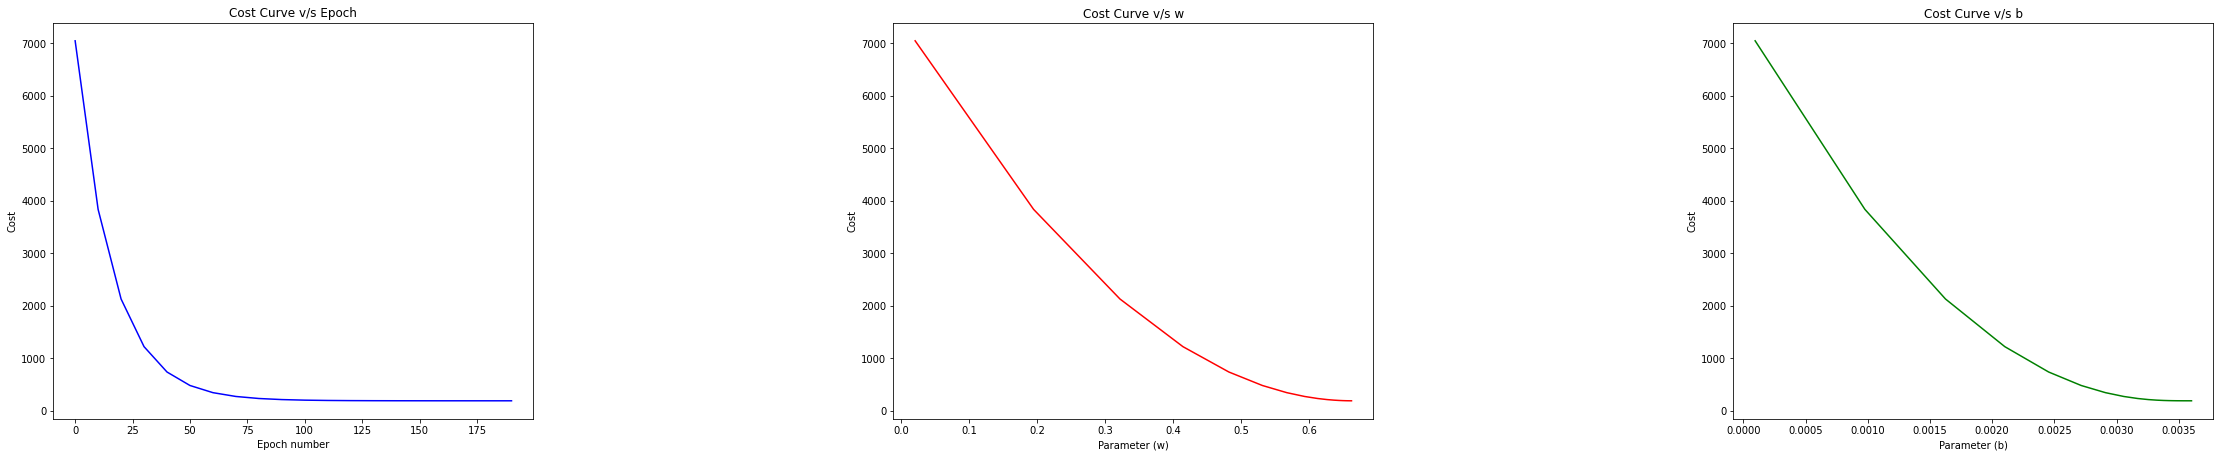

{0: [0.003619960558757169, 0.6630086188002224], 10: [0.003619960558757169, 0.6630086188002224], 20: [0.003619960558757169, 0.6630086188002224], 30: [0.003619960558757169, 0.6630086188002224], 40: [0.003619960558757169, 0.6630086188002224], 50: [0.003619960558757169, 0.6630086188002224], 60: [0.003619960558757169, 0.6630086188002224], 70: [0.003619960558757169, 0.6630086188002224], 80: [0.003619960558757169, 0.6630086188002224], 90: [0.003619960558757169, 0.6630086188002224], 100: [0.003619960558757169, 0.6630086188002224], 110: [0.003619960558757169, 0.6630086188002224], 120: [0.003619960558757169, 0.6630086188002224], 130: [0.003619960558757169, 0.6630086188002224], 140: [0.003619960558757169, 0.6630086188002224], 150: [0.003619960558757169, 0.6630086188002224], 160: [0.003619960558757169, 0.6630086188002224], 170: [0.003619960558757169, 0.6630086188002224], 180: [0.003619960558757169, 0.6630086188002224], 190: [0.003619960558757169, 0.6630086188002224]}


In [7]:
#Plot the learning curve, curve between cost and epoch
import matplotlib.pyplot as plt
parameters=[-0.00001,0.00005]
alpha=0.000001
epoch_max = 200
cost_list={}
parameter_list={}
param_cost_list_1={}
param_cost_list_0={}
parameters,cost,cost_list,parameter_list, param_cost_list_1, param_cost_list_0 = batch_gradient_descent(x_train, y_train, parameters, alpha, epoch_max)

plt.title("Cost Curve")
plt.subplot(1,3,1)
plt.title("Cost Curve v/s Epoch")
plt.plot(cost_list.keys(),cost_list.values(), c="blue")
plt.xlabel("Epoch number")
plt.ylabel("Cost")
plt.subplot(1,3,2)
plt.title("Cost Curve v/s w")
plt.plot(param_cost_list_1.keys(), param_cost_list_1.values(),c="red")
plt.xlabel("Parameter (w)")
plt.ylabel("Cost")
plt.subplot(1,3,3)
plt.title("Cost Curve v/s b")
plt.plot(param_cost_list_0.keys(), param_cost_list_0.values(),c="green")
plt.xlabel("Parameter (b)")
plt.ylabel("Cost")
plt.subplots_adjust(left=1.0, right=6.0, top=1.5, hspace=1.5,wspace=0.75)
plt.show()

print(parameter_list)

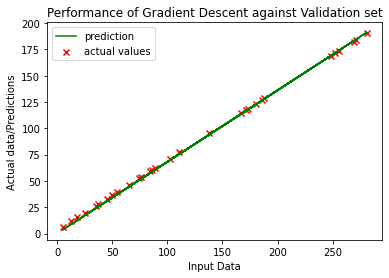

In [8]:
import matplotlib.pyplot as plt
#Make predictions on validation set
parameters1 = [0.0036074754087815596, 0.6810518933205848]
hx_valid = compute_hx(x_valid,parameters1)

#Making a scatter plot of actual y-values and predicted values
"""
plt.title("Performance against Validation set")
plt.subplot(1,2,1)
plt.scatter(x_valid, y_valid, c="red", marker="x", label="actual values")
plt.xlabel("Input Data")
plt.ylabel("Actual Values")
plt.subplot(1,2,2)
plt.plot(x_valid, hx_valid, c="green", label="prediction")
plt.xlabel("Input Data")
plt.ylabel("Predictions")
plt.legend()
plt.show()
"""
"""
fig, ax = plt.subplots(1,2)
fig.suptitle("Performance against Validation set")
ax[0].scatter(x_valid, y_valid, c="red", marker="x", label="actual values")
ax[0].set_xlabel("Input Data")
ax[0].set_ylabel("Actual Values")
ax[1].plot(x_valid, hx_valid, c="green", label="prediction")
ax[1].set_xlabel("Input Data")
ax[1].set_ylabel("Predictions")
plt.subplots_adjust(wspace=0.5)
fig.show()
"""

plt.title("Performance of Gradient Descent against Validation set")
plt.scatter(x_valid, y_valid, c="red", marker="x", label="actual values")
plt.plot(x_valid, hx_valid, c="green", label="prediction")
plt.xlabel("Input Data")
plt.ylabel("Actual data/Predictions")
plt.legend()
plt.show()


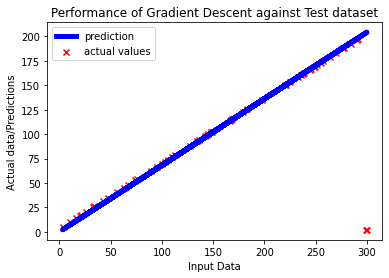

In [15]:
parameters1 = [0.0036074754087815596, 0.6810518933205848]
dataset_x=dataset['X']
dataset_y=dataset['Y']
hx_test = compute_hx(x_test,parameters1)
# hx_entire = compute_hx(dataset_x,parameters1)
plt.title("Performance of Gradient Descent against Test dataset")
plt.scatter(x_test, y_test, c="red", marker="x", label="actual values")
plt.plot(x_test, hx_test, c="blue", label="prediction",linewidth="5")
plt.xlabel("Input Data")
plt.ylabel("Actual data/Predictions")
plt.legend()
plt.show()

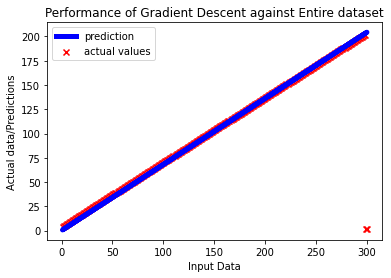

In [9]:
parameters1 = [0.0036074754087815596, 0.6810518933205848]
dataset_x=dataset['X']
dataset_y=dataset['Y']
hx_entire = compute_hx(dataset_x,parameters1)
plt.title("Performance of Gradient Descent against Entire dataset")
plt.scatter(dataset_x, dataset_y, c="red", marker="x", label="actual values")
plt.plot(dataset_x, hx_entire, c="blue", label="prediction",linewidth="5")
plt.xlabel("Input Data")
plt.ylabel("Actual data/Predictions")
plt.legend()
plt.show()

In [ ]:
#Method - 2 Use normal equation instead of Gradient Descent
#The normal equation method is suitable when dataset size is small (<100 rows)
import numpy as np
def normal_equation(x,y):
    #Adding x0=1 to each instance
    x_new=np.array([np.ones(len(x)),x.values.flatten()]).T
    #Finding the parameters
    theta_best_values=np.linalg.inv(x_new.T.dot(x_new)).dot(x_new.T).dot(y)
    return theta_best_values

print(normal_equation(x_train, y_train))

In [ ]:
import matplotlib.pyplot as plt
#Make predictions on validation set
parameters1 = [7.6469418,  0.62474995]
hx_valid = compute_hx(x_valid,parameters1)

plt.title("Performance of Normal Equation method against Validation set")
plt.scatter(x_valid, y_valid, c="red", marker="x", label="actual values")
plt.plot(x_valid, hx_valid, c="cyan", label="prediction")
plt.xlabel("Input Data")
plt.ylabel("Actual data/Predictions")
plt.legend()
plt.show()


In [ ]:
parameters1 = [7.6469418,  0.62474995]
dataset_x=dataset['X']
dataset_y=dataset['Y']
hx_entire = compute_hx(dataset_x,parameters1)
plt.title("Performance of Normal Equation method against Entire dataset")
plt.scatter(dataset_x, dataset_y, c="red", marker="x", label="actual values")
plt.plot(dataset_x, hx_entire, c="blue", label="prediction",linewidth="5")
plt.xlabel("Input Data")
plt.ylabel("Actual data/Predictions")
plt.legend()
plt.show()